## First we must imports the libraries that we must need

In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
from ipywidgets import interact
import cufflinks as cf

%matplotlib inline
cf.go_offline()

## Answer nº1

In [3]:
# First of all we should call the DataFrame to be able to work with it.
data = pd.read_csv('./data folder/IMDB-Movie-Data.csv')
data.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
# We need to know with what kind of data frame whe are dealing with
data.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [5]:
# And we see the basics functions with the numerics columns
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


## Answer nº2

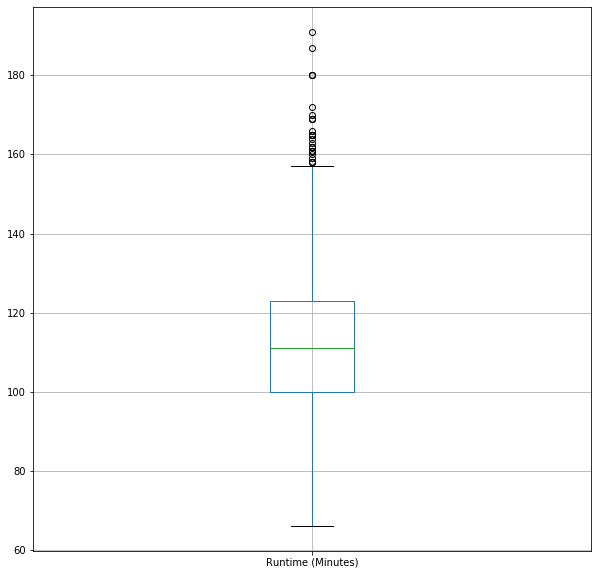

In [6]:
# Then we start to select some differents charts to representate our data
data.boxplot(column = 'Runtime (Minutes)', figsize = (10,10));


# This way we can see that the average of minutes for all the movies is around 110 min or 1 hour and 20 minutes.

## Answer nº3

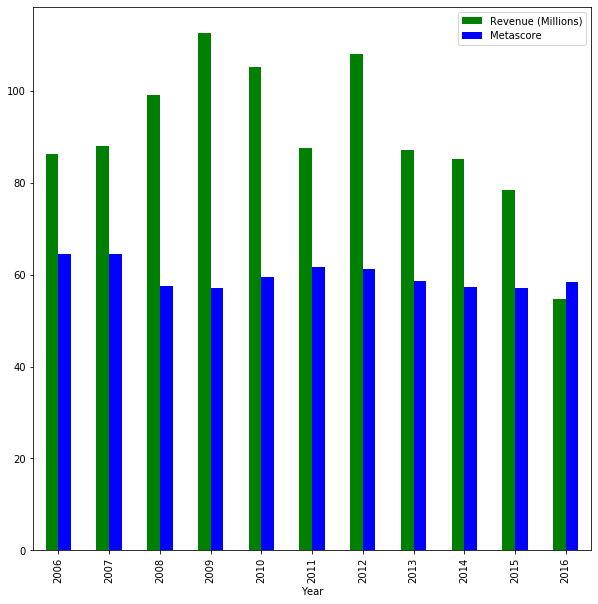

In [7]:
# Now we can see which gender did more money againts the votes from the audiences
data_money = data[['Revenue (Millions)', 'Metascore', 'Year']].groupby(['Year']).agg('mean')
data_money.plot.bar(fontsize = (10), color = ('green', 'blue'), figsize = (10,10));


# With this representation we can see that only on 2016 the revenue was lower than the Metascore on average
# and the most profitable year was 2009 (in the middle of the Wrold crisis) but the metascore wasn't good

## Answer nº4

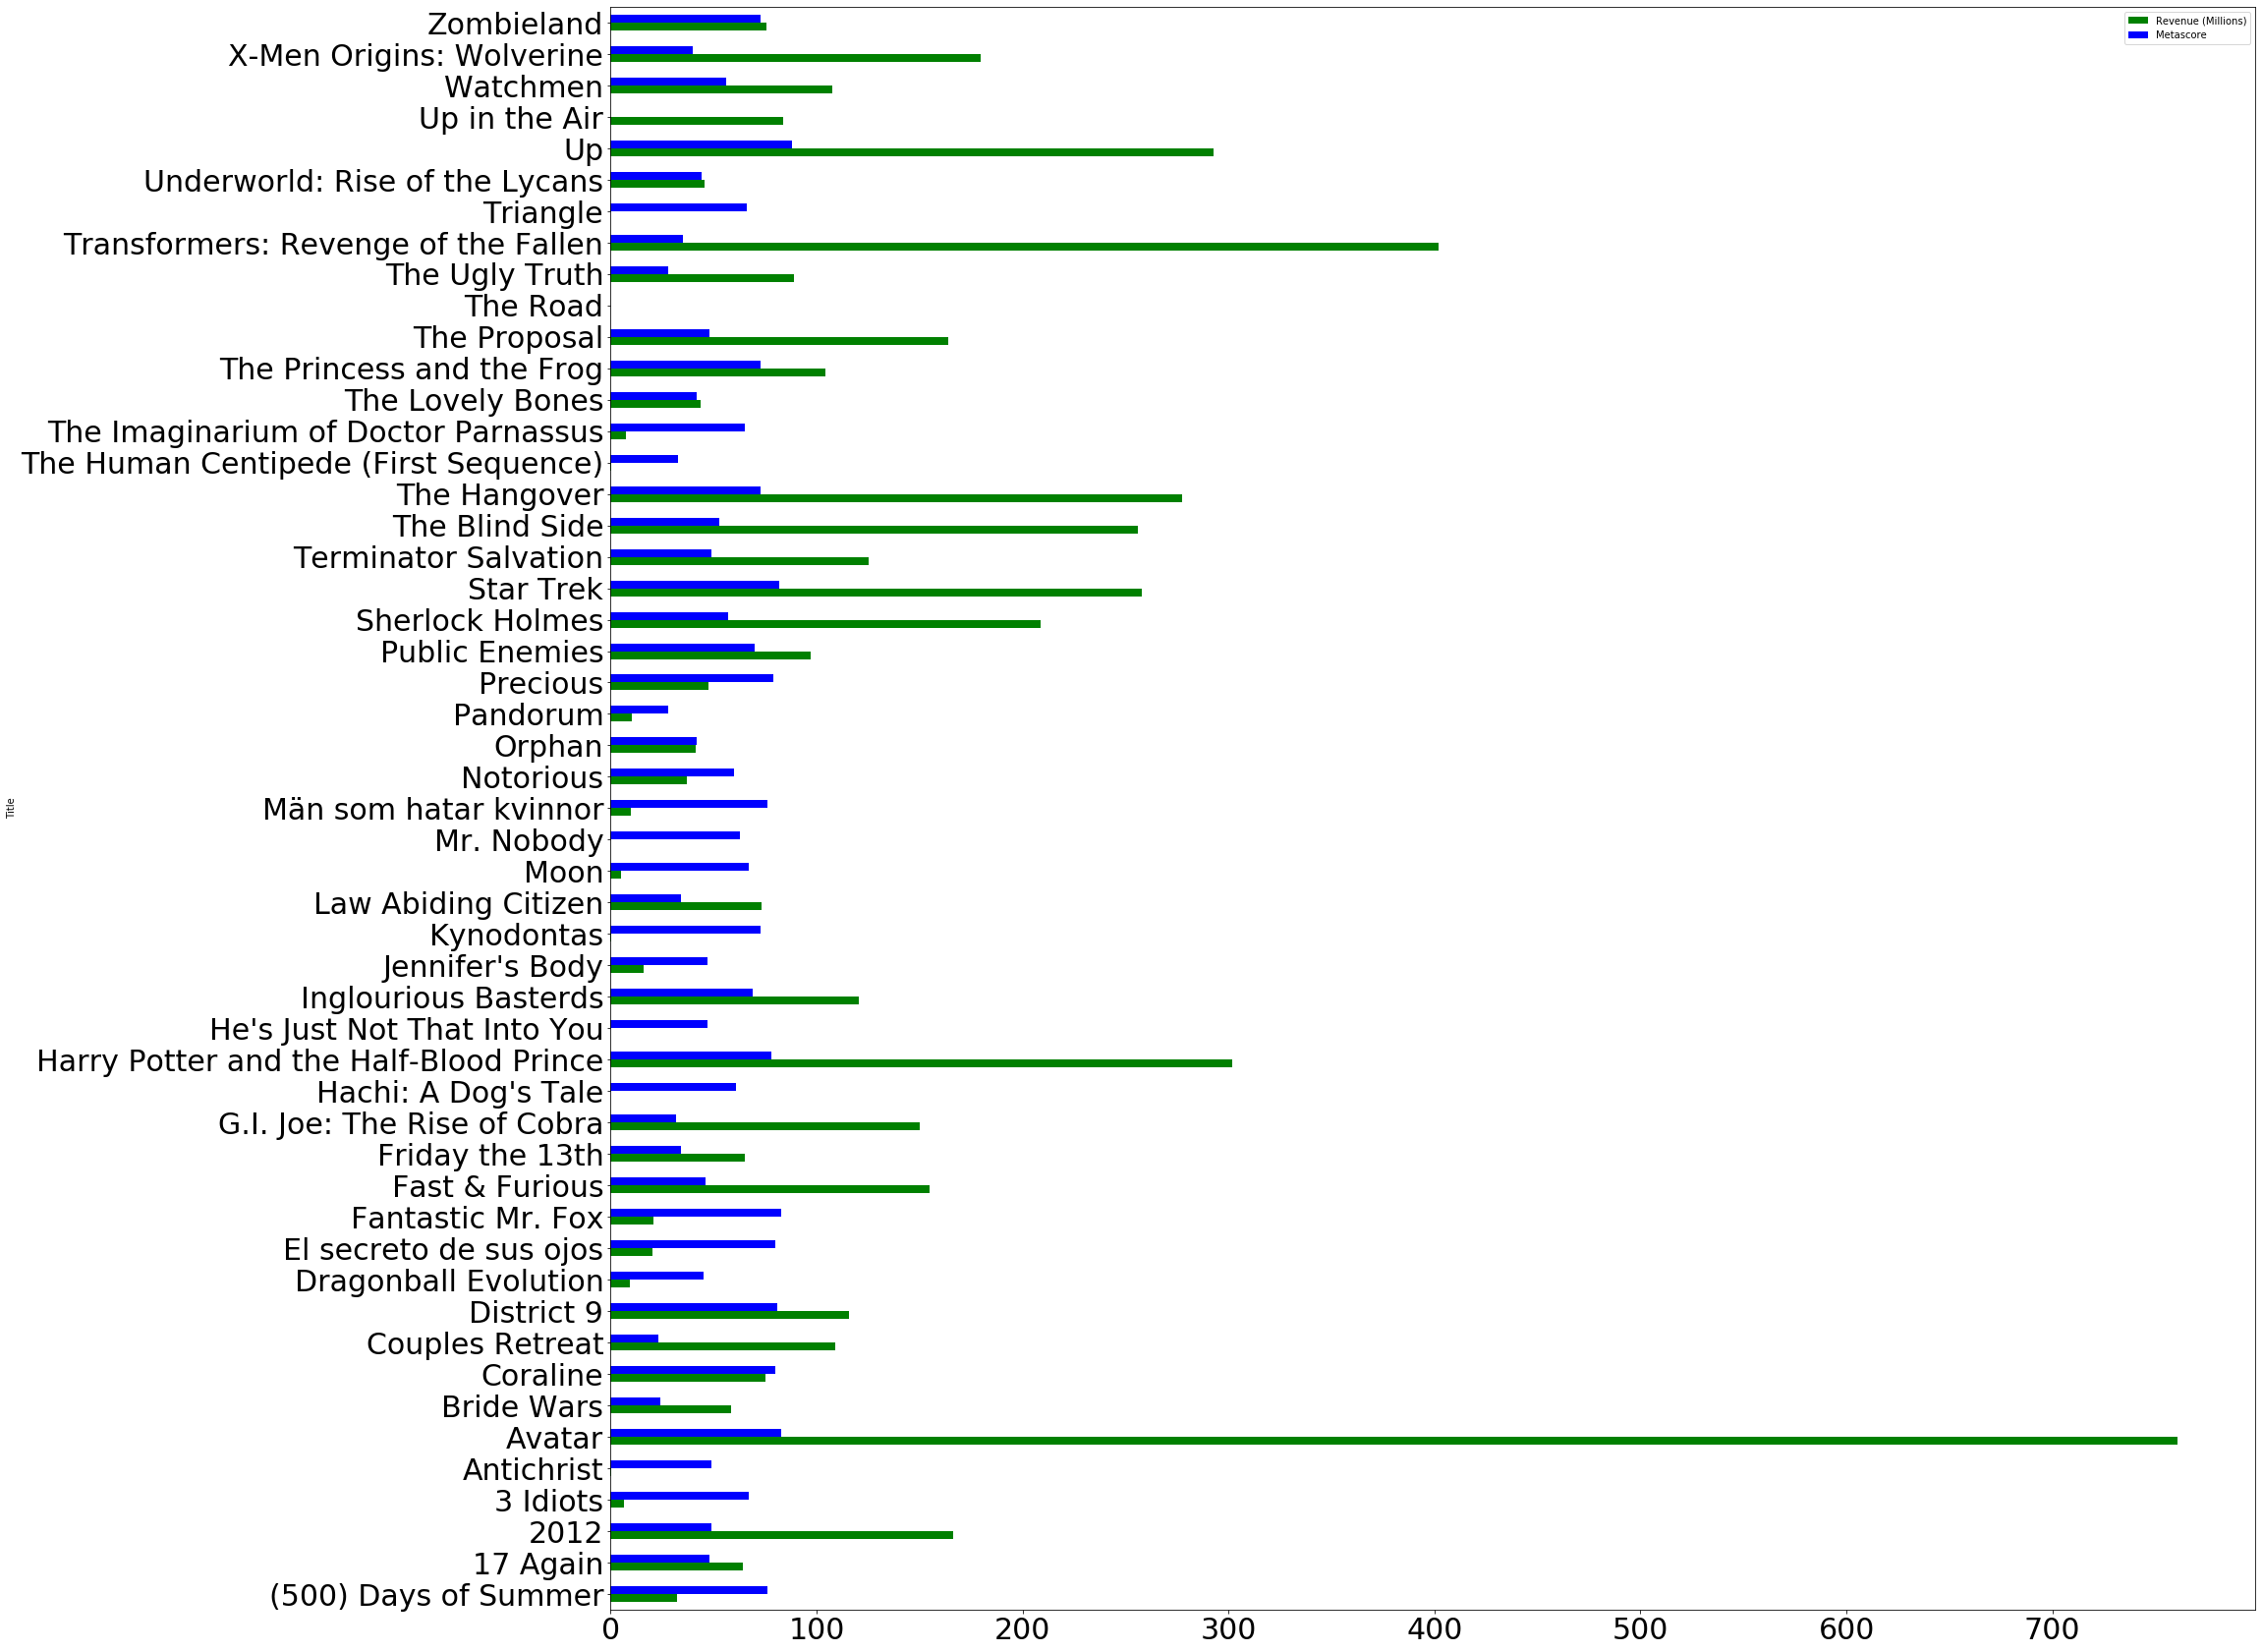

In [8]:
# So if we want to have a better look into the year 2009 we can see the movies where made that year.
is_2009 = data['Year']==2009
data_2009 = data[is_2009]

data_money_2009 = data_2009[['Revenue (Millions)', 'Metascore', 'Title']].groupby(['Title']).agg('sum')
data_money_2009.plot.barh(fontsize = (30), color = ('green', 'blue'),  figsize = (30,30));



## Answer nº5

In [9]:
array_Director = ['James Cameron', 'Martin Scorsese', 'Quentin Tarantino', 'Mel Gibson', 'Ridley Scott', 'Steven Spielberg']
data_Director = data.loc[data['Director'].isin(array_Director)]


In [26]:
data_4_D = data_Director(x='Title', y='Revenue (Millions)', category_orders='Director')

data_4_D.iplot(kind='bar', xTitle='Title', subplots=True, yTitle='Revenue (Millions)', title='Revenue by Director',)


TypeError: pivot_table() got an unexpected keyword argument 'x'

## Answer nº6

In [15]:
# And to see the 2 sides of a coin we are going to look for the less profitable movie on the less profitable year.

# We did it and there is to many movies with the realise date on 2016 to be able to see properly, so we need to think on a proper way of representing the data.

@interact(Year=list(data['Year'].unique()))

def scatter(Year):
    data_movies = data[(data['Year']==Year)]
    
    data_movies.iplot(kind='scatter', x='Revenue (Millions)', y='Metascore', categories='Title', text='Title', xTitle='Revenue in Millions', yTitle='Imdb Metascore', title='Revenue vs Metascore by Years');

# So in this interactive scatter we can selected: Year. So we can mannually filter any movie and see the Revenue and de Meta score that the movie had.

    

interactive(children=(Dropdown(description='Year', options=(2014, 2012, 2016, 2015, 2007, 2011, 2008, 2006, 20…